## CS-E4820 Machine Learning: Advanced Probabilistic Methods (spring 2021)

Pekka Marttinen, Santosh Hiremath, Tianyu Cui, Yogesh Kumar, Zheyang Shen, Alexander Aushev, Khaoula El Mekkaoui, Shaoxiong Ji, Alexander Nikitin, Sebastiaan De Peuter, Joakim Järvinen.

## Exercise 5, due on Tuesday February 23 at 23:00.

### Contents
1. Problem 1: EM for missing observations
2. Problem 2: Extension of 'simple example' from the lecture
3. Problem 3: PyTorch

# Problem 1: EM for missing observations
Suppose random variables $X_{i}$ follow a bivariate normal distribution $X_{i}\sim \mathcal{N}_{2}(0,\Sigma)$, where
$ \Sigma = \begin{bmatrix} 1 & \rho\\ \rho & 1 \end{bmatrix} $.

Suppose further that we have observations on $X_{1}=(X_{11},X_{12})^{T}$, $X_{2}=(X_{21},X_{22})^{T}$ and $X_{3}=(X_{31},X_{32})^{T}$, such that
$X_{1}$ and $X_{3}$ are fully observed, and from $X_{2}$ we have observed only
the second coordinate. Thus, our data matrix can be written as

$$
\begin{bmatrix}
x_{11} & x_{12}\\
? & x_{22}\\
x_{31} & x_{32}
\end{bmatrix} 
$$


where the rows correspond to the transposed observations $\mathbf{x}_{1}^{T},\mathbf{x}_{2}^{T},\mathbf{x}_{3}^{T}$. Suppose we want to learn the unknown parameter $\rho$ using the EM-algorithm. Denote the missing observation by $Z$ and derive the E-step of the algorithm, i.e., __(a)__ write the complete data log-likelihood $\ell(\rho)$, __(b)__ compute the posterior distribution of the missing observation, given the observed variables and current estimate for $\rho$, and __(c)__ evaluate the expectation of $\ell(\rho)$ with respect to the posterior distribution of the missing observations.

**Hints**:

1. In general, for $X \sim \mathcal{N}_2(\boldsymbol{\mu},\boldsymbol{\Sigma})$, where $X=(X_1, X_2)^{T}$, $\boldsymbol{\mu}=(\mu_1, \mu_2)^{T}$ and $\boldsymbol{\Sigma} = \begin{pmatrix} 
            \sigma_1^{2} & \rho\sigma_{1}\sigma_{2} \\ 
            \rho\sigma_{1}\sigma_{2} & \sigma_2^{2} 
            \end{pmatrix}$, 
we have 
$$ X_1 \mid X_2 = x_2 \sim \mathcal{N}\left(\mu_1 + \frac{\sigma_1}{\sigma_2}\rho(x_2-\mu_2), (1-\rho^2)\sigma_1^{2}\right),$$  with $\rho$ being the correlation coefficient.
2. For evaluating the expectation of $\ell(\rho)$, you can make use of the following two rules: 
    - $\mathbf{x_2}^T \boldsymbol{\Sigma}^{-1} \mathbf{x_2} = trace(\boldsymbol{\Sigma}^{-1}\mathbf{x_2x_2^T}).$
    - if $X \sim \mathcal{N}(\mu, \sigma^2)$ then $\langle{X^2}\rangle = \mu^2 + \sigma^2$.




 __(a)__ write the complete data log-likelihood
$$\begin{aligned}
\ell(\rho)&=\log \prod_{i=1}^{3} p\left(x_{i} \mid \rho\right)\\
&=\sum_{i=1}^{3}\log  p\left(x_{i} \mid \rho\right)\\
&=-\frac{1}{2}x_1^{T}\Sigma^{-1}x_{1}-\frac{1}{2}x_2^T\Sigma^{-1}x_{2}-\frac{1}{2}x_3^T\Sigma^{-1}x_{3}-\frac{3}{2}\log{(1-\rho^2})-3\log(2\pi)
\end{aligned}$$
__(b)__ compute the posterior distribution of the missing observation, given the observed variables and current estimate for $\rho$
According to the Hint 1, we have
$$\begin{aligned}
P(Z|x_{22})&\sim \mathcal{N}\left(Z|0+ \frac{1}{1}\rho (x_{22}-0),(1-\rho^2)1^2 \right)\\
&=\mathcal{N}\left(Z|\rho x_{22},(1-\rho^2) \right)\\
&=\frac{1}{\sqrt{2\pi (1-\rho^2)}}\exp{\left( -\frac{Z-\rho x_{22}}{2\ (1-\rho^2)}\right)}.
\end{aligned}$$
Therefore,
$$\begin{aligned}
E_{Z \mid X, \rho_{0}}(Z)&=\rho x_{22}\\
E_{Z \mid X, \rho_{0}}(Z^2)&=1-\rho^2+\rho^2 x_{22}^2
\end{aligned}$$
__(c)__ evaluate the expectation of $\ell(\rho)$ with respect to the posterior distribution of the missing observations.

According to the Hint 1, we have
$$\begin{aligned}
Q(\rho,\rho_0)&=E_{Z \mid X, \rho_{0}}\left(\ell(\rho)\right)\\
&=E_{Z \mid X, \rho_{0}}\left(-\frac{1}{2}x_1^{T}\Sigma^{-1}x_{1}-\frac{1}{2}x_2^T\Sigma^{-1}x_{2}-\frac{1}{2}x_3^T\Sigma^{-1}x_{3}-\frac{3}{2}\log{(1-\rho^2})-3\log(2\pi)\right)\\
&=-\frac{1}{2}E_{Z \mid X, \rho_{0}}\left(x_2^T\Sigma^{-1}x_{2}\right)-\frac{3}{2}\log{(1-\rho^2)}-3\log(2\pi)-\frac{1}{2}x_1^T\Sigma^{-1}x_{1}-\frac{1}{2}x_3^T\Sigma^{-1}x_{3}\\
\text{By using hint 2,}\\
&=-\frac{1}{2}E_{Z \mid X, \rho_{0}}\left(trace\left(\Sigma^{-1}x_{2}x_2^T\right)\right)-\frac{3}{2}\log{(1-\rho^2})-3\log(2\pi)-\frac{1}{2}trace\left(\Sigma^{-1}x_{1}x_1^T\right)-\frac{1}{2}trace\left(\Sigma^{-1}x_{3}x_3^T\right)\\
\text{The first term}\\
 &=-\frac{1}{2}trace\left(
\left[\begin{array}{ll}
1 & \rho \\
\rho & 1
\end{array}\right]^{-1}
\left[\begin{array}{cc}
E_{Z \mid X, \rho_{0}}\left(Z^{2}\right) & E_{Z \mid X, \rho_{0}}(Z) x_{22} \\
E_{Z \mid X, \rho_{0}}(Z) x_{22} & x_{22}^{2}
\end{array}\right]\right)
\\
&=-\frac{1}{2}trace\left(
\frac{1}{1-\rho^{2}}\left[\begin{array}{cc}
1 & -\rho \\
-\rho & 1
\end{array}\right]
\left[\begin{array}{cc}
\rho_0^{2} x_{22}^{2}+1-\rho_0^{2} & \rho_0 x_{22}^{2} \\
\rho_0 x_{22}^{2} & x_{22}^{2}
\end{array}\right]\right)\\
&=-\frac{1}{2}\left(\frac{1-\rho_0^2-\rho_0^2x_{22}^2+x_{22}^2-2\rho\rho_0x_{22}^2}{1-\rho^2}\right).\\
\text{Then the fourth term }\\
&=-\frac{1}{2}trace\left(
\frac{1}{1-\rho^{2}}\left[\begin{array}{cc}
1 & -\rho \\
-\rho & 1
\end{array}\right]
\left[\begin{array}{cc}
x_{11}^2 & x_{11}x_{12} \\
x_{12}x_{11} & x_{12}^{2}
\end{array}\right]\right)\\
&=-\frac{1}{2-2\rho^2}\left(x_{11}^2-2\rho x_{11}x_{12}+x_{12}^2\right).\\
\text{Similarly, the fifth term}\\
&=-\frac{1}{2-2\rho^2}\left(x_{31}^2-2\rho x_{31}x_{32}+x_{32}^2\right).\\
\text{Therefore, }\\
Q(\rho,\rho_0)&=-\frac{1}{2-2\rho^2}\left(1-\rho_0^2-\rho_0^2x_{22}^2+x_{22}^2-2\rho\rho_0x_{22}^2+x_{11}^2-2\rho x_{11}x_{12}+x_{12}^2+x_{31}^2-2\rho x_{31}x_{32}+x_{32}^2\right)+c,\\
\text{where } c=-\frac{3}{2}\log{(1-\rho^2})-3\log(2\pi).
\end{aligned}$$

# Problem 2: Extension of 'simple example' from the lecture
Suppose that we have $N$ independent observations $x = ( x_1, \dots, x_N )$ from a two-component mixture of univariate Gaussian distributions with unknown mixing co-efficients and unknown mean of the second component:
$$ p(x_{n} \mid \theta,\tau)=(1-\tau)\mathcal{N}(x_{n}|0,1)+\tau\mathcal{N}(x_{n} \mid \theta,1).$$

**(a)** Write down the complete data log-likelihood and derive the EM-algorithm for learning the maximum likelihood estimates for $\theta$ and $\tau$. 

**(b)** Simulate some data from the model ($N = 100$ samples) with the true values of parameters $\theta$ = 3 and $\tau = 0.5$. Run your EM algorithm to see whether the learned parameters converge close to the true values (by e.g. just listing the estimates from a few iterations or plotting them). Use the code template below (after the answer cell) as a starting point. 

**HINT**: The E and M steps for simple example.pdf from the lecture material looks as follows
```Python
	# E-step: compute the responsibilities r2 for component 2
	r1_unnorm = scipy.stats.norm.pdf(x, 0, 1)
	r2_unnorm = scipy.stats.norm.pdf(x, theta_0, 1)
	r2 = r2_unnorm / (r1_unnorm + r2_unnorm)
	
	# M-step: compute the parameter value that maximizes
	# the expectation of the complete-data log-likelihood.
	theta[it] = sum(r2 * x) / sum(r2)
```






Write your answer to Problem 2(a) here
We introduce unobersrved **latent variables** $Z=\{z_n\}_{n=1}^N$,
$
z_{n}=\left(z_{n 1}, z_{n 2}\right)^{T}=\left\{\begin{array}{ll}
(1,0)^{T}, & \text{if} \ x_{n}\sim N\left(x_{n} \mid 0,1\right) \\
(0,1)^{T}, & \text{if} \ x_{n}\sim N\left(x_{n} \mid \theta,1\right)
\end{array}\right.
$

Hence
$$\begin{aligned}
\log(p(X,Z|\theta,\tau)&=\log\left(\prod_{n=1}^{N}p(x_n,z_n|\theta,\tau) \right)\\
&=\sum_{n=1}^{N}\log\left(p(x_n,z_n|\theta,\tau) \right)\\
&=\sum_{n=1}^{N}\log\left(\left((1-\tau)\mathcal{N}(x_n|0,1)\right)^{z_{n1}}+\left(\tau\mathcal{N}(x_n|\theta,1)\right)^{z_{n2}}\right)\\
&=\sum_{n=1}^{N}z_{n1}\log(1-\tau)+z_{n0}\log\tau+z_{n1}\log(\mathcal{N}(x_n|0,1))+z_{n2}\log(\mathcal{N}(x_n|\theta,1))
\end{aligned}$$
## Derive the EM-algorithm
### E step
\begin{aligned}
\gamma(z_{n2})&=p\left(z_{n 2}=1\mid\mathbf{x}_{n},\theta_0,\rho_0\right)&=\frac{\tau_{0} \mathcal{N}\left(x_{n} \mid \theta_{0}, 1\right)}{\left(1-\tau_{0}\right) \mathcal{N}\left(x_{n} \mid 0,1\right)+\tau_{0} \mathcal{N}\left(x_{n} \mid \theta_{0}, 1\right)}.\\ 
\end{aligned}
Then we compute the expectation of the complete log-likelihood over the posterior distribution of the latent variables:
$$
\begin{aligned}
Q\left(\theta, \tau, \theta_{0}, \tau_{0}\right)&=E_{z \mid x, \theta_{0}, \tau_{0}}(\log p(x, z \mid \theta,\tau))\\
&=\sum_{n=1}^{N}\left(E_{z \mid x, \theta_{0}, \tau_{0}}\left(z_{n 1}\right) \log \mathcal{N}\left(x_{n} \mid 0,1\right)+E_{z \mid x, \theta_{0}, \tau_{0}}\left(z_{n 2}\right) \log \mathcal{N}\left(x_{n} \mid \theta, 1\right)\right.\\&+
\left.E_{z \mid x, \theta_{0}, \tau_{0}}\left(z_{n 1} \log (1-\tau)\right)+E_{z \mid x, \theta_{0}, \tau_{0}}\left(z_{n 2} \log \tau\right)\right)\\
&=\sum_{n=1}^N\left(1-\gamma\left(z_{n 2}\right)\right) \log \mathcal{N}\left(x_{n} \mid 0,1\right)+\gamma\left(z_{n 2}\right) \log \mathcal{N}\left(x_{n} \mid \theta, 1\right) \\&+\left(1-\gamma\left(z_{n 2}\right)\right) \log (1-\tau)+\gamma\left(z_{n 2}\right) \log \tau.\\
\end{aligned}
$$

### M step
Firstly, we evulate $\theta$
\begin{aligned}
\frac{d}{d \theta} Q\left(\theta, \tau, \theta_{0}, \tau_{0}\right)&=\frac{d}{d \theta}\left(\gamma\left(z_{n 2}\right) \log \mathcal{N}\left(x_{n} \mid \theta, 1\right)\right)\\
&=\sum_{n=1}^{N} \gamma\left(z_{n 2}\right)\left(x_{n}-\theta\right)
\end{aligned}
Hence
$$
\frac{d}{d \theta} Q\left(\theta, \tau, \theta_{0}, \tau_{0}\right)=\sum_{n=1}^{N} \gamma\left(z_{n 2}\right)\left(x_{n}-\theta\right)=0,
$$
and thus
$$
\theta^{\text {new }}=\frac{\sum_{n=1}^{N} \gamma\left(z_{n 2}\right) x_{n}}{\sum_{n=1}^{N} \gamma\left(z_{n 2}\right)}.
$$
Secondly, we evulate $\gamma$
\begin{aligned}
\frac{d}{d \tau} Q\left(\theta, \tau, \theta_{0}, \tau_{0}\right)&=\frac{d}{d \tau}\left(\left(1-\gamma\left(z_{n 2}\right)\right) \log (1-\tau)+\gamma\left(z_{n 2}\right) \log \tau\right)\\
&=\sum_{n=1}^{N}\frac{\gamma(z_{n2})-1}{1-\tau}+\frac{\gamma(z_{n2})}{\tau}\\
&=\sum_{n=1}^{N}\frac{\gamma(z_{n2})-\tau}{(1-\tau)\tau}\\
&=\frac{-N\tau+\sum_{n=1}^{N}\gamma(z_{n2})}{N(1-\tau)\tau}
\end{aligned}
Hence $$\frac{d}{d \tau} Q\left(\theta, \tau, \theta_{0}, \tau_{0}\right)=\frac{-N\tau+\sum_{n=1}^{N}\gamma(z_{n2})}{N(1-\tau)\tau}=0,$$
and thus
$$
\tau^{\text{new}}=\frac{\sum_{n=1}^{N}\gamma(z_{n2})}{N}.
$$
In detail, $\sum_{n=1}^{N}\gamma(z_{n2})$ can be interpreted as the number of obeservations to the second component.


theta       tau
1.0000000  0.1000000
3.2393002  0.3798055
3.2787207  0.5396835
3.2208416  0.5618515
3.2012856  0.5684228
3.1949151  0.5705275
3.1928396  0.5712102
3.1921631  0.5714324
3.1919426  0.5715048
3.1918707  0.5715284
3.1918472  0.5715361
3.1918396  0.5715386
3.1918371  0.5715394
3.1918363  0.5715397
3.1918360  0.5715397
3.1918359  0.5715398
3.1918359  0.5715398
3.1918359  0.5715398
3.1918359  0.5715398
3.1918359  0.5715398


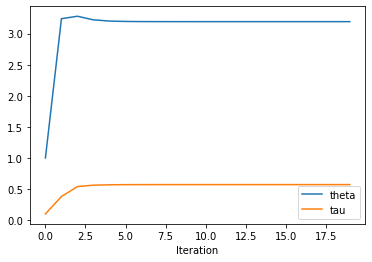

In [1]:
# template for Problem 2(b)
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt


### Simulate data:

np.random.seed(0)

theta_true = 3
tau_true = 0.5
n_samples = 100

x = np.zeros(n_samples)
for i in range(n_samples):
    # Sample from N(0,1) or N(theta_true,1)
    if np.random.rand() < 1 - tau_true:
        x[i] = np.random.normal(0, 1)
    else:
        x[i] = np.random.normal(theta_true, 1)


### The EM algorithm:

n_iter = 20
theta = np.zeros(n_iter)
tau = np.zeros(n_iter)

# Initial guesses for theta and tau
theta[0] = 1
tau[0] = 0.1

for it in range(1, n_iter):
    # The current estimates for theta and tau,
    # computed in the previous iteration
    theta_0 = theta[it-1]
    tau_0 = tau[it-1]

    # E-step: compute the responsibilities r1 and r2
    # r1 = ?
    # r2 = ?
    
    # YOUR CODE HERE
    r1_unnorm=(1-tau_0)*scipy.stats.norm.pdf(x,0,1)
    r2_unnorm=tau_0*scipy.stats.norm.pdf(x,theta_0,1)
    r1=r1_unnorm/(r1_unnorm+r2_unnorm)
    r2=r2_unnorm/(r1_unnorm+r2_unnorm)
    # M-step: compute the parameter values that maximize
    # the expectation of the complete-data log-likelihood.
    # theta[it] = ?
    # tau[it] = ?
    theta[it]=sum(r2*x)/sum(r2)
    tau[it]=np.mean(r2)
    # YOUR CODE HERE
    
    

# Print and plot the values of theta and tau in each iteration
print("theta       tau")
for theta_i, tau_i in zip(theta, tau):
    print("{0:.7f}  {1:.7f}".format(theta_i, tau_i))

plt.plot(range(n_iter), theta, label = 'theta')
plt.plot(range(n_iter), tau, label = 'tau')
plt.xlabel('Iteration')
plt.legend()
plt.show()

### Problem 3: PyTorch
Go through the PyTorch tutorials in the three links and answer the questions given below

1) What is PyTorch: https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py

2) Autograd: https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py

3) Linear regression with PyTorch: https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/linear_regression/main.py

__(a)__ What are PyTorch Tensors and how do you run a CPU tensor on GPU? 


__(b)__ What is Automatic differentiation and autograd? 


__(c)__ PyTorch constructs the computation graph dynamically as the operations are defined. In the 'linear regression with PyTorch' tutorial which line numbers indicates the completion of the computation graph, computation of the gradients and update of the weights, respectively? 



Write your answer to Problem 3 here.

### a) 
Tensors are very similar to NumPy’s ndarrays, except that tensors can run on **GPUs** or other specialized hardware to accelerate computing.

We can allocate a GPU in Colab:
```
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
```

### b)
**Automatic differentiation** is the technique for the evaluation of the derivatives of a function automatically based on neural networks.

Autograd is PyTorch’s automatic differentiation engine that powers neural network training. Generally speaking, autograd is an engine for computing vector-Jacobian product $
J^{T} \cdot {\overrightarrow{v }}
$.

### c)
**The completion of the computation graph:** lines 23

**The computation of the gradients:** line 41

**The update of the weights:** line 42